In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d cpluzshrijayan/milkquality

Dataset URL: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality
License(s): unknown
  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 2.79MB/s]


In [4]:
!mkdir milkquality
!unzip milkquality.zip -d milkquality
!ls milkquality

Archive:  milkquality.zip
  inflating: milkquality/milknew.csv  
milknew.csv


In [5]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical, plot_model

In [6]:
data = pd.read_csv('milkquality/milknew.csv')

In [7]:
data['Grade'] = data['Grade'].map({'low': 0, 'medium': 1, 'high': 2})

In [8]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [9]:
features = ['pH','Temprature','Taste','Odor','Fat ','Turbidity','Colour']
x = data[features]
y = data['Grade']

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)


In [11]:
y = to_categorical(y)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42)

In [13]:
model = Sequential([
    Dense(64, input_dim=len(features), activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4867 (19.01 KB)
Trainable params: 4867 (19.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

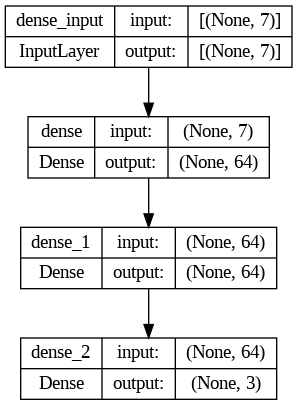

In [16]:
plot_model(model, show_shapes=True)

In [17]:
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
22/22 [==============================] - 1s 14ms/step - loss: 1.0444 - accuracy: 0.4092 - val_loss: 1.0216 - val_accuracy: 0.4059
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.9344 - accuracy: 0.5465 - val_loss: 0.9139 - val_accuracy: 0.5412
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.8334 - accuracy: 0.6603 - val_loss: 0.8203 - val_accuracy: 0.5471
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.7427 - accuracy: 0.6470 - val_loss: 0.7375 - val_accuracy: 0.6529
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.7134 - val_loss: 0.7043 - val_accuracy: 0.6000
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6104 - accuracy: 0.7386 - val_loss: 0.6293 - val_accuracy: 0.7529
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5502 - accuracy: 0.7607 - val_loss: 0.5665 - val_accuracy: 0.7529
Epoch 8/100


In [18]:
score = model.evaluate(x_test, y_test)
print('Akurasi = ', score[1])

7/7 [==============================] - 0s 6ms/step - loss: 0.0929 - accuracy: 0.9434
Akurasi =  0.9433962106704712


In [22]:
def predict_milk_quality(model, x):
    predictions = model.predict(x)
    predicted_classes = np.argmax(predictions, axis=1)
    return ['low' if pred == 0 else 'medium' if pred == 1 else 'high' for pred in predicted_classes]

In [23]:
def get_user_input():
    print("Masukkan nilai untuk setiap fitur berikut:")
    pH = float(input("pH: "))
    temperature = float(input("Temperature: "))
    taste = int(input("Taste (0: Normal, 1: Abnormal): "))
    odor = int(input("Odor (0: Normal, 1: Abnormal): "))
    fat = int(input("Fat (0: Low, 1: High): "))
    turbidity = int(input("Turbidity (0: Low, 1: High): "))
    colour = int(input("Colour (240-320): "))

    user_input = np.array([[pH, temperature, taste, odor, fat, turbidity, colour]])
    return user_input

In [24]:
def predict_user_input(model, scaler):
    user_input = get_user_input()
    user_input_scaled = scaler.transform(user_input)
    predicted_quality = predict_milk_quality(model, user_input_scaled)
    print('Predicted quality:', predicted_quality[0])

In [31]:
predict_user_input(model, min_max_scaler)

Masukkan nilai untuk setiap fitur berikut:
pH: 6.6
Temperature: 37
Taste (0: Normal, 1: Abnormal): 1
Odor (0: Normal, 1: Abnormal): 0
Fat (0: Low, 1: High): 1
Turbidity (0: Low, 1: High): 0
Colour (240-320): 254
1/1 [==============================] - 0s 20ms/step
Predicted quality: high


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
predict_user_input(model, min_max_scaler)

Masukkan nilai untuk setiap fitur berikut:
pH: 8.5
Temperature: 70
Taste (0: Normal, 1: Abnormal): 1
Odor (0: Normal, 1: Abnormal): 1
Fat (0: Low, 1: High): 1
Turbidity (0: Low, 1: High): 1
Colour (240-320): 246
1/1 [==============================] - 0s 21ms/step
Predicted quality: low


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [33]:
model.save('milk.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
model = tf.keras.models.load_model('./milk.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./milk.tflite", "wb").write(tflite_model)

9376